In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
!pip install -q kaggle

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rezaseidgar","key":"87df51df3f17e77c3e0b2e4a2b031614"}'}

In [10]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 86% 80.0M/93.0M [00:00<00:00, 64.5MB/s]
100% 93.0M/93.0M [00:00<00:00, 99.9MB/s]


In [13]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 27.2MB/s]


In [14]:
!ls

 apartment-rental-offers-in-germany.zip   mobile-price-classification.zip
'kaggle (1).json'			  sample_data
 kaggle.json


In [15]:
!unzip '/content/apartment-rental-offers-in-germany.zip' -d '/content/'

Archive:  /content/apartment-rental-offers-in-germany.zip
  inflating: /content/immo_data.csv  


In [16]:
!unzip '/content/mobile-price-classification.zip' -d '/content/'

Archive:  /content/mobile-price-classification.zip
  inflating: /content/test.csv       
  inflating: /content/train.csv      


In [17]:
train3 = pd.read_csv('/content/train.csv')
train3.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [18]:
data = pd.read_csv('/content/immo_data.csv')
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [20]:
data.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [21]:
mask = ((data.isna().sum()/len(data)) > 0.5)
data.columns[mask]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [22]:
data = data.drop(columns=data.columns[mask])
data.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

In [23]:
data.columns.size

42

In [24]:
data = data.drop(columns=['scoutId','heatingType','newlyConst','yearConstructed'
                          ,'firingTypes','yearConstructedRange','houseNumber','street'
                          ,'lift','description','facilities','date'])
data.shape

(268850, 30)

In [25]:
data._get_numeric_data().mean()

serviceCharge           151.206113
balcony                   0.616455
picturecount              9.791958
pricetrend                3.389001
telekomUploadSpeed       28.804928
totalRent               901.331522
hasKitchen                0.342407
cellar                    0.640636
baseRent                694.129432
livingSpace              74.355548
baseRentRange             3.765256
geo_plz               37283.022235
noRooms                   2.641261
thermalChar             114.749533
floor                     2.122405
numberOfFloors            3.572319
noRoomsRange              2.571542
garden                    0.196232
livingSpaceRange          3.070790
dtype: float64

In [26]:
data.fillna(data._get_numeric_data().mean(),inplace=True)

In [27]:
data.isna().sum()

regio1                     0
serviceCharge              0
telekomTvOffer         32619
balcony                    0
picturecount               0
pricetrend                 0
telekomUploadSpeed         0
totalRent                  0
hasKitchen                 0
geo_bln                    0
cellar                     0
baseRent                   0
livingSpace                0
geo_krs                    0
condition              68489
interiorQual          112665
petsAllowed           114573
streetPlain            71013
baseRentRange              0
typeOfFlat             36614
geo_plz                    0
noRooms                    0
thermalChar                0
floor                      0
numberOfFloors             0
noRoomsRange               0
garden                     0
livingSpaceRange           0
regio2                     0
regio3                     0
dtype: int64

In [28]:
for col in data.columns :
  if data[col].dtype == 'int64' or data[col].dtype == 'float64':
    up = data[col].mean() + 3*data[col].std()
    low = data[col].mean() - 3*data[col].std()
    mask = (data[col] > up ) | (data[col] < low )
    data = data.drop(data[mask].index)

In [29]:
y = data['livingSpace']

In [30]:
y.head()

0    86.00
1    89.00
2    83.80
3    58.15
4    84.97
Name: livingSpace, dtype: float64

In [31]:
for col in data.columns :
  if (data[col].dtype == 'int64' or data[col].dtype == 'float64') and (col !='livingSpace'):
    data[col] = (data[col] - min(data[col])) /(max(data[col]) - min(data[col]))

In [32]:
data.head()

,regio1,serviceCharge,telekomTvOffer,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,geo_bln,cellar,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,streetPlain,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,0.231678,ONE_YEAR_FREE,False,0.206897,0.605465,0.230769,0.012993,False,Nordrhein_Westfalen,True,0.015179,86.00,Dortmund,well_kept,normal,NaN,Schüruferstraße,0.375,ground_floor,0.437910,0.333333,0.700812,0.166667,0.166667,0.75,True,0.500000,Dortmund,Schüren
1,Rheinland_Pfalz,0.126714,ONE_YEAR_FREE,True,0.275862,0.507259,0.230769,0.013941,False,Rheinland_Pfalz,False,0.020408,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,NaN,0.500,ground_floor,0.671807,0.222222,0.443176,0.260200,0.198462,0.50,False,0.500000,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,0.241135,ONE_YEAR_FREE,True,0.275862,0.443211,0.035897,0.020108,False,Sachsen,True,0.024617,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,0.625,apartment,0.002471,0.222222,0.443176,0.333333,0.222222,0.50,False,0.500000,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,0.054988,ONE_YEAR_FREE,True,0.310345,0.341588,1.000000,0.013941,False,Sachsen,False,0.008750,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Glück-Auf-Straße,0.125,other,0.088223,0.222222,0.332045,0.333333,0.198462,0.50,False,0.166667,Mittelsachsen_Kreis,Freiberg
4,Bremen,0.130496,NaN,True,0.655172,0.421008,0.712947,0.013967,False,Bremen,False,0.019515,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,0.500,apartment,0.275967,0.222222,0.729803,0.166667,0.198462,0.50,False,0.500000,Bremen,Neu_Schwachhausen


In [33]:
print(data.shape)
print(y.shape)

(259737, 30)
(259737,)


In [34]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    data[col] = data[col].fillna(data[col].value_counts().head(1).index[0])

In [35]:
data.isna().sum()

regio1                0
serviceCharge         0
telekomTvOffer        0
balcony               0
picturecount          0
pricetrend            0
telekomUploadSpeed    0
totalRent             0
hasKitchen            0
geo_bln               0
cellar                0
baseRent              0
livingSpace           0
geo_krs               0
condition             0
interiorQual          0
petsAllowed           0
streetPlain           0
baseRentRange         0
typeOfFlat            0
geo_plz               0
noRooms               0
thermalChar           0
floor                 0
numberOfFloors        0
noRoomsRange          0
garden                0
livingSpaceRange      0
regio2                0
regio3                0
dtype: int64

In [36]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    print(col)
    print(data[col].value_counts())
    print('_______________________________')

regio1
Nordrhein_Westfalen       60791
Sachsen                   57199
Bayern                    20916
Sachsen_Anhalt            19818
Hessen                    17183
Niedersachsen             16106
Baden_Württemberg         15629
Thüringen                  8278
Rheinland_Pfalz            8171
Berlin                     7949
Brandenburg                6810
Mecklenburg_Vorpommern     6521
Schleswig_Holstein         6471
Hamburg                    3612
Bremen                     2905
Saarland                   1378
Name: regio1, dtype: int64
_______________________________
telekomTvOffer
ONE_YEAR_FREE    251339
NONE               4838
ON_DEMAND          3560
Name: telekomTvOffer, dtype: int64
_______________________________
balcony
True     159905
False     99832
Name: balcony, dtype: int64
_______________________________
hasKitchen
False    171865
True      87872
Name: hasKitchen, dtype: int64
_______________________________
geo_bln
Nordrhein_Westfalen       60791
Sachsen               

In [37]:
data['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    251339
NONE               4838
ON_DEMAND          3560
Name: telekomTvOffer, dtype: int64

In [38]:
others = list(data['telekomTvOffer'].value_counts().tail(2).index)
def edit_telekomTvOffer(a):
  if a in others:
    return 'others'
  return a
data['telekomTvOffer'] = data['telekomTvOffer'].apply(edit_telekomTvOffer)
data['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    251339
others             8398
Name: telekomTvOffer, dtype: int64

In [39]:
print(data['condition'].value_counts())

well_kept                             131037
refurbished                            26241
fully_renovated                        25477
first_time_use                         21067
mint_condition                         20954
modernized                             16551
first_time_use_after_refurbishment     14921
negotiable                              2177
need_of_renovation                      1308
ripe_for_demolition                        4
Name: condition, dtype: int64


In [40]:
others = list(data['condition'].value_counts().tail(3).index)
def edit_condition(a):
  if a in others:
    return 'others'
  return a
data['condition'] = data['condition'].apply(edit_condition)
data['condition'].value_counts()

well_kept                             131037
refurbished                            26241
fully_renovated                        25477
first_time_use                         21067
mint_condition                         20954
modernized                             16551
first_time_use_after_refurbishment     14921
others                                  3489
Name: condition, dtype: int64

In [41]:
print(data['interiorQual'].value_counts())

normal           188961
sophisticated     61972
luxury             6933
simple             1871
Name: interiorQual, dtype: int64


In [42]:
others = list(data['interiorQual'].value_counts().tail(2).index)
def edit_interiorQual(a):
  if a in others:
    return 'others'
  return a
data['interiorQual'] = data['interiorQual'].apply(edit_interiorQual)
data['interiorQual'].value_counts()

normal           188961
sophisticated     61972
others             8804
Name: interiorQual, dtype: int64

In [43]:
data['geo_krs'].unique().size

419

In [44]:
others = list(data['geo_krs'].value_counts().tail(400).index)
def edit_geo_krs(a):
  if a in others:
    return 'others'
  return a
data['geo_krs'] = data['geo_krs'].apply(edit_geo_krs)
data['geo_krs'].value_counts()

others                  167157
Leipzig                  13441
Chemnitz                 12421
Berlin                    7949
Dresden                   7378
Magdeburg                 4756
Halle_Saale               4493
München                   4202
Essen                     4188
Frankfurt_am_Main         4075
Hamburg                   3612
Düsseldorf                3569
Duisburg                  3430
Mittelsachsen_Kreis       3141
Dortmund                  3049
Gelsenkirchen             2828
Recklinghausen_Kreis      2634
Köln                      2600
Zwickau                   2489
Wuppertal                 2325
Name: geo_krs, dtype: int64

In [45]:
print(data['regio3'].unique().size)
print(data['regio2'].unique().size)
print(data['streetPlain'].unique().size)

8615
419
53069


In [46]:
data = data.drop(columns=['regio2','regio3','streetPlain'])
data.shape

(259737, 27)

In [47]:
y.head()

0    86.00
1    89.00
2    83.80
3    58.15
4    84.97
Name: livingSpace, dtype: float64

In [48]:
cor_matrix = data.corr()

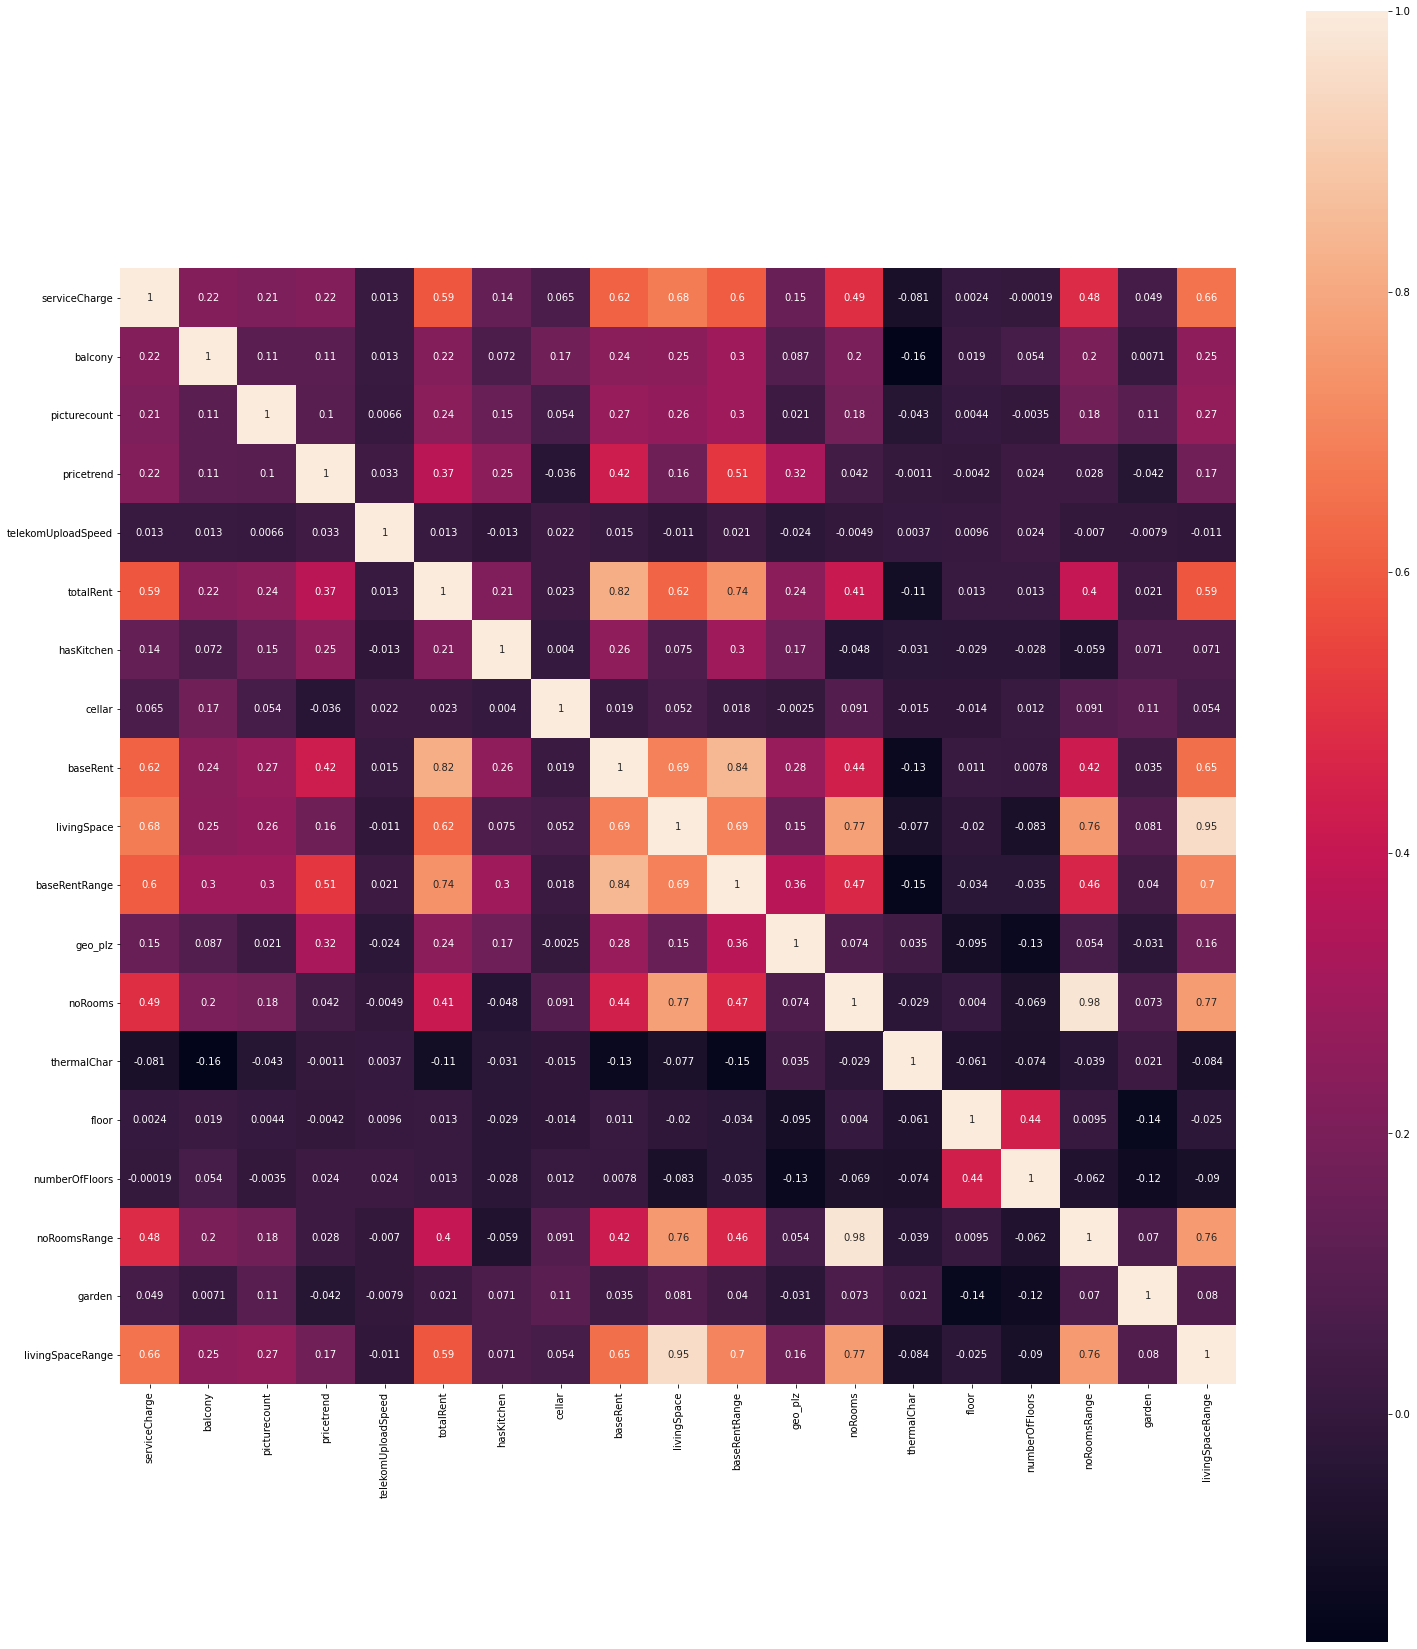

In [49]:
f , ax = plt.subplots(figsize=(25,30))
sns.heatmap(cor_matrix,square=True,annot=True)

In [50]:
cate_features = []

for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    cate_features.append(col)

cate_features

['regio1',
 'telekomTvOffer',
 'balcony',
 'hasKitchen',
 'geo_bln',
 'cellar',
 'geo_krs',
 'condition',
 'interiorQual',
 'petsAllowed',
 'typeOfFlat',
 'garden']

In [51]:
dum_features = pd.get_dummies(data[cate_features])
dum_features.head()

,balcony,hasKitchen,cellar,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_others,geo_bln_Baden_Württemberg,geo_bln_Bayern,geo_bln_Berlin,geo_bln_Brandenburg,geo_bln_Bremen,geo_bln_Hamburg,geo_bln_Hessen,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,geo_krs_Berlin,geo_krs_Chemnitz,...,geo_krs_Duisburg,geo_krs_Düsseldorf,geo_krs_Essen,geo_krs_Frankfurt_am_Main,geo_krs_Gelsenkirchen,geo_krs_Halle_Saale,geo_krs_Hamburg,geo_krs_Köln,geo_krs_Leipzig,geo_krs_Magdeburg,geo_krs_Mittelsachsen_Kreis,geo_krs_München,geo_krs_Recklinghausen_Kreis,geo_krs_Wuppertal,geo_krs_Zwickau,geo_krs_others,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_others,condition_refurbished,condition_well_kept,interiorQual_normal,interiorQual_others,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,False,False,True,True,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,True,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,True,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,True,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,True,False,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [52]:
data = pd.concat([data,dum_features],axis=1)
data.head()

,regio1,serviceCharge,telekomTvOffer,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,hasKitchen,geo_bln,cellar,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,balcony,hasKitchen,cellar,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,...,geo_krs_Duisburg,geo_krs_Düsseldorf,geo_krs_Essen,geo_krs_Frankfurt_am_Main,geo_krs_Gelsenkirchen,geo_krs_Halle_Saale,geo_krs_Hamburg,geo_krs_Köln,geo_krs_Leipzig,geo_krs_Magdeburg,geo_krs_Mittelsachsen_Kreis,geo_krs_München,geo_krs_Recklinghausen_Kreis,geo_krs_Wuppertal,geo_krs_Zwickau,geo_krs_others,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_others,condition_refurbished,condition_well_kept,interiorQual_normal,interiorQual_others,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,Nordrhein_Westfalen,0.231678,ONE_YEAR_FREE,False,0.206897,0.605465,0.230769,0.012993,False,Nordrhein_Westfalen,True,0.015179,86.00,Dortmund,well_kept,normal,negotiable,0.375,ground_floor,0.437910,0.333333,0.700812,0.166667,0.166667,0.75,True,0.500000,False,False,True,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,Rheinland_Pfalz,0.126714,ONE_YEAR_FREE,True,0.275862,0.507259,0.230769,0.013941,False,Rheinland_Pfalz,False,0.020408,89.00,others,refurbished,normal,no,0.500,ground_floor,0.671807,0.222222,0.443176,0.260200,0.198462,0.50,False,0.500000,True,False,False,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,Sachsen,0.241135,ONE_YEAR_FREE,True,0.275862,0.443211,0.035897,0.020108,False,Sachsen,True,0.024617,83.80,Dresden,first_time_use,sophisticated,negotiable,0.625,apartment,0.002471,0.222222,0.443176,0.333333,0.222222,0.50,False,0.500000,True,False,True,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,Sachsen,0.054988,ONE_YEAR_FREE,True,0.310345,0.341588,1.000000,0.013941,False,Sachsen,False,0.008750,58.15,Mittelsachsen_Kreis,well_kept,normal,negotiable,0.125,other,0.088223,0.222222,0.332045,0.333333,0.198462,0.50,False,0.166667,True,False,False,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,Bremen,0.130496,ONE_YEAR_FREE,True,0.655172,0.421008,0.712947,0.013967,False,Bremen,False,0.019515,84.97,others,refurbished,normal,negotiable,0.500,apartment,0.275967,0.222222,0.729803,0.166667,0.198462,0.50,False,0.500000,True,False,False,False,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [53]:
data = data.drop(columns=cate_features)
data.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_others,geo_bln_Baden_Württemberg,geo_bln_Bayern,geo_bln_Berlin,geo_bln_Brandenburg,geo_bln_Bremen,geo_bln_Hamburg,geo_bln_Hessen,...,geo_krs_Duisburg,geo_krs_Düsseldorf,geo_krs_Essen,geo_krs_Frankfurt_am_Main,geo_krs_Gelsenkirchen,geo_krs_Halle_Saale,geo_krs_Hamburg,geo_krs_Köln,geo_krs_Leipzig,geo_krs_Magdeburg,geo_krs_Mittelsachsen_Kreis,geo_krs_München,geo_krs_Recklinghausen_Kreis,geo_krs_Wuppertal,geo_krs_Zwickau,geo_krs_others,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_others,condition_refurbished,condition_well_kept,interiorQual_normal,interiorQual_others,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,0.231678,0.206897,0.605465,0.230769,0.012993,0.015179,86.00,0.375,0.437910,0.333333,0.700812,0.166667,0.166667,0.75,0.500000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0.126714,0.275862,0.507259,0.230769,0.013941,0.020408,89.00,0.500,0.671807,0.222222,0.443176,0.260200,0.198462,0.50,0.500000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0.241135,0.275862,0.443211,0.035897,0.020108,0.024617,83.80,0.625,0.002471,0.222222,0.443176,0.333333,0.222222,0.50,0.500000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0.054988,0.310345,0.341588,1.000000,0.013941,0.008750,58.15,0.125,0.088223,0.222222,0.332045,0.333333,0.198462,0.50,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0.130496,0.655172,0.421008,0.712947,0.013967,0.019515,84.97,0.500,0.275967,0.222222,0.729803,0.166667,0.198462,0.50,0.500000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [54]:
data.shape

(259737, 93)

In [55]:
x = data.drop(columns=['livingSpace'])
print(x.shape)
print(y.shape)

(259737, 92)
(259737,)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [57]:
#  BAKHSHE 1 HALATE 1

In [58]:
df1 = data.iloc[:50000,:]
df2 = data.iloc[50000:100000,:]
df3 = data.iloc[100000:150000,:]
df4 = data.iloc[150000:200000,:]
df5 = data.iloc[200000:250000,:]

In [59]:
dfnot1 = pd.concat([df2,df3,df4,df5])
dfnot2 = pd.concat([df1,df3,df4,df5])
dfnot3 = pd.concat([df1,df2,df4,df5])
dfnot4 = pd.concat([df1,df2,df3,df5])
dfnot5 = pd.concat([df1,df2,df3,df4])

In [60]:
xnot1 = dfnot1['livingSpaceRange']
xnot2 = dfnot2['livingSpaceRange']
xnot3 = dfnot3['livingSpaceRange']
xnot4 = dfnot4['livingSpaceRange']
xnot5 = dfnot5['livingSpaceRange']

ynot1 = dfnot1['livingSpace']
ynot2 = dfnot2['livingSpace']
ynot3 = dfnot3['livingSpace']
ynot4 = dfnot4['livingSpace']
ynot5 = dfnot5['livingSpace']

xtest1 = df1['livingSpaceRange']
xtest2 = df2['livingSpaceRange']
xtest3 = df3['livingSpaceRange']
xtest4 = df4['livingSpaceRange']
xtest5 = df5['livingSpaceRange']

ytest1 = df1['livingSpace']
ytest2 = df2['livingSpace']
ytest3 = df3['livingSpace']
ytest4 = df4['livingSpace']
ytest5 = df5['livingSpace']

In [61]:
allxnot = [xnot1,xnot2,xnot3,xnot4,xnot5]
allynot = [ynot1,ynot2,ynot3,ynot4,ynot5]
allxtest = [xtest1,xtest2,xtest3,xtest4,xtest5]
allytest = [ytest1,ytest2,ytest3,ytest4,ytest5]

In [62]:
import sklearn.metrics as mr

In [63]:
scores = []
mse = []
for i in range(5):

  np.random.seed(42)
  b = np.random.randn(1)
  w = np.random.randn(1)
  lr = 0.01
  epochs = 5000

  for epoch in range(epochs):
      error = allynot[i] -((w*allxnot[i]) + b)

      loss = (error**2).mean()

      if loss > 10**50 :
        break

      if (epoch+1) % 1000 == 0:    
          print('epoch ' + str(epoch+1)+'  mse: ' + str(loss))
    
      wgrad = 0
      bgrad = 0
    
      wgrad = -1 * (allxnot[i] * error).mean()
      w = w - (lr * wgrad)
        
      bgrad = -1 * error.mean()
      b = b - (lr*bgrad)
  print('fold ' + str(i+1))
  print('--------------------------------------')

  ypred = (w * allxtest[i]) + b            
  scores.append(mr.r2_score(allytest[i],ypred))
  mse.append(mean_squared_error(allytest[i],ypred))

epoch 1000  mse: 319.5621519271404
epoch 2000  mse: 179.93421464478922
epoch 3000  mse: 126.45216006073926
epoch 4000  mse: 105.96678846440543
epoch 5000  mse: 98.12022286956966
fold 1
--------------------------------------
epoch 1000  mse: 321.1284405467196
epoch 2000  mse: 181.60579820223123
epoch 3000  mse: 128.16278934274857
epoch 4000  mse: 107.69188106658636
epoch 5000  mse: 99.85066676011864
fold 2
--------------------------------------
epoch 1000  mse: 318.3878438363149
epoch 2000  mse: 179.1581274290692
epoch 3000  mse: 125.69917697070224
epoch 4000  mse: 105.17295975164649
epoch 5000  mse: 97.29166784988283
fold 3
--------------------------------------
epoch 1000  mse: 320.89168382554493
epoch 2000  mse: 180.99166052861898
epoch 3000  mse: 127.41563055006853
epoch 4000  mse: 106.89818574350517
epoch 5000  mse: 99.04083719489724
fold 4
--------------------------------------
epoch 1000  mse: 319.0023152633161
epoch 2000  mse: 179.38334193666532
epoch 3000  mse: 125.820441733002

In [64]:
print('acuracy in 5_fold cross validation ' + str(np.mean(scores)))
print('mse in 5_fold cross validation ' + str(np.mean(mse)))

acuracy in 5_fold cross validation 0.8992696802895596
mse in 5_fold cross validation 98.33687716563861


In [65]:
df1 = data.iloc[:25000,:]
df2 = data.iloc[25000:50000,:]
df3 = data.iloc[50000:75000,:]
df4 = data.iloc[75000:100000,:]
df5 = data.iloc[100000:125000,:]
df6 = data.iloc[125000:150000,:]
df7 = data.iloc[150000:175000,:]
df8 = data.iloc[175000:200000,:]
df9 = data.iloc[200000:225000,:]
df10 = data.iloc[225000:250000,:]

In [66]:
dfnot1 = pd.concat([df2,df3,df4,df5,df6,df7,df8,df9,df10])
dfnot2 = pd.concat([df1,df3,df4,df5,df6,df7,df8,df9,df10])
dfnot3 = pd.concat([df1,df2,df4,df5,df6,df7,df8,df9,df10])
dfnot4 = pd.concat([df1,df2,df3,df5,df6,df7,df8,df9,df10])
dfnot5 = pd.concat([df1,df2,df3,df4,df6,df7,df8,df9,df10])
dfnot6 = pd.concat([df1,df2,df3,df4,df5,df7,df8,df9,df10])
dfnot7 = pd.concat([df1,df2,df3,df4,df5,df6,df8,df9,df10])
dfnot8 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df9,df10])
dfnot9 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df10])
dfnot10 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])

In [67]:
xnot1 = dfnot1['livingSpaceRange']
xnot2 = dfnot2['livingSpaceRange']
xnot3 = dfnot3['livingSpaceRange']
xnot4 = dfnot4['livingSpaceRange']
xnot5 = dfnot5['livingSpaceRange']
xnot6 = dfnot6['livingSpaceRange']
xnot7 = dfnot7['livingSpaceRange']
xnot8 = dfnot8['livingSpaceRange']
xnot9 = dfnot9['livingSpaceRange']
xnot10 = dfnot10['livingSpaceRange']

ynot1 = dfnot1['livingSpace']
ynot2 = dfnot2['livingSpace']
ynot3 = dfnot3['livingSpace']
ynot4 = dfnot4['livingSpace']
ynot5 = dfnot5['livingSpace']
ynot6 = dfnot6['livingSpace']
ynot7 = dfnot7['livingSpace']
ynot8 = dfnot8['livingSpace']
ynot9 = dfnot9['livingSpace']
ynot10 = dfnot10['livingSpace']

xtest1 = df1['livingSpaceRange']
xtest2 = df2['livingSpaceRange']
xtest3 = df3['livingSpaceRange']
xtest4 = df4['livingSpaceRange']
xtest5 = df5['livingSpaceRange']
xtest6 = df6['livingSpaceRange']
xtest7 = df7['livingSpaceRange']
xtest8 = df8['livingSpaceRange']
xtest9 = df9['livingSpaceRange']
xtest10 = df10['livingSpaceRange']

ytest1 = df1['livingSpace']
ytest2 = df2['livingSpace']
ytest3 = df3['livingSpace']
ytest4 = df4['livingSpace']
ytest5 = df5['livingSpace']
ytest6 = df6['livingSpace']
ytest7 = df7['livingSpace']
ytest8 = df8['livingSpace']
ytest9 = df9['livingSpace']
ytest10 = df10['livingSpace']

In [68]:
allxnot = [xnot1,xnot2,xnot3,xnot4,xnot5,xnot6,xnot7,xnot8,xnot9,xnot10]
allynot = [ynot1,ynot2,ynot3,ynot4,ynot5,ynot6,ynot7,ynot8,ynot9,ynot10]
allxtest = [xtest1,xtest2,xtest3,xtest4,xtest5,xtest6,xtest7,xtest8,xtest9,xtest10]
allytest = [ytest1,ytest2,ytest3,ytest4,ytest5,ytest6,ytest7,ytest8,ytest9,ytest10]

In [69]:
scores = []
mse = []
for i in range(10):

  np.random.seed(42)
  b = np.random.randn(1)
  w = np.random.randn(1)
  lr = 0.01
  epochs = 5000

  for epoch in range(epochs):
      error = allynot[i] -((w*allxnot[i]) + b)

      loss = (error**2).mean()

      if loss > 10**50 :
        break

      if (epoch+1) % 1000 == 0:    
          print('epoch ' + str(epoch+1)+'  mse: ' + str(loss))
    
      wgrad = 0
      bgrad = 0
    
      wgrad = -1 * (allxnot[i] * error).mean()
      w = w - (lr * wgrad)
        
      bgrad = -1 * error.mean()
      b = b - (lr*bgrad)
  print('fold ' + str(i+1))
  print('--------------------------------------')

  ypred = (w * allxtest[i]) + b            
  scores.append(mr.r2_score(allytest[i],ypred))
  mse.append(mean_squared_error(allytest[i],ypred))

epoch 1000  mse: 319.272082046276
epoch 2000  mse: 179.76857020617476
epoch 3000  mse: 126.28611087766669
epoch 4000  mse: 105.78215770741271
epoch 5000  mse: 97.92141044766977
fold 1
--------------------------------------
epoch 1000  mse: 320.1107165175113
epoch 2000  mse: 180.41029381278912
epoch 3000  mse: 126.90387838387802
epoch 4000  mse: 106.41047933298377
epoch 5000  mse: 98.56133822915976
fold 2
--------------------------------------
epoch 1000  mse: 321.72990219670874
epoch 2000  mse: 181.7978091537073
epoch 3000  mse: 128.24818365369043
epoch 4000  mse: 107.75565512184292
epoch 5000  mse: 99.91351389848683
fold 3
--------------------------------------
epoch 1000  mse: 319.0423192239508
epoch 2000  mse: 179.86495306523045
epoch 3000  mse: 126.4609478619207
epoch 4000  mse: 105.96919788481449
epoch 5000  mse: 98.10627045973159
fold 4
--------------------------------------
epoch 1000  mse: 318.7029094959346
epoch 2000  mse: 179.22527506114153
epoch 3000  mse: 125.73671294727994

In [70]:
print('acuracy in 10_fold cross validation ' + str(np.mean(scores)))
print('mse in 10_fold cross validation ' + str(np.mean(mse)))

acuracy in 10_fold cross validation 0.8993632020700149
mse in 10_fold cross validation 98.34255794397609


In [71]:
#  BAKHSHE 1 HALATE 2

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
reg = LinearRegression()
acuracy5 = cross_val_score(reg,x['livingSpaceRange'].values.reshape(-1,1),y.values.reshape(-1,1),cv=5)
acuracy10 =cross_val_score(reg,x['livingSpaceRange'].values.reshape(-1,1),y.values.reshape(-1,1),cv=10)
mse5 = cross_val_score(reg,x['livingSpaceRange'].values.reshape(-1,1),y.values.reshape(-1,1),cv=5,scoring='neg_mean_squared_error')
mse10 = cross_val_score(reg,x['livingSpaceRange'].values.reshape(-1,1),y.values.reshape(-1,1),cv=10,scoring='neg_mean_squared_error')

In [75]:
print('acuracy in 5_fold cross validation ' + str(acuracy5.mean()))
print('acuracy in 10_fold cross validation ' + str(acuracy10.mean()))
print('MSE in 5 fold cross validation ' + str(-mse5.mean()))
print('MSE in 10 fold cross validation ' + str(-mse10.mean()))

acuracy in 5_fold cross validation 0.9048634710483114
acuracy in 10_fold cross validation 0.9049041983746916
MSE in 5 fold cross validation 92.82938604613234
MSE in 10 fold cross validation 92.83021657910533


In [76]:
#  BAKHSHE 1 HALATE 3

In [77]:
reg = LinearRegression()
newx = x[['livingSpaceRange' , 'noRooms' , 'numberOfFloors' , 'thermalChar']]
acuracy5 = cross_val_score(reg,newx,y.values.reshape(-1,1),cv=5)
acuracy10 =cross_val_score(reg,newx,y.values.reshape(-1,1),cv=10)
mse5 = cross_val_score(reg,newx,y.values.reshape(-1,1),cv=5,scoring='neg_mean_squared_error')
mse10 = cross_val_score(reg,newx,y.values.reshape(-1,1),cv=10,scoring='neg_mean_squared_error')

In [78]:
print('acuracy in 5_fold cross validation ' + str(acuracy5.mean()))
print('acuracy in 10_fold cross validation ' + str(acuracy10.mean()))
print('MSE in 5 fold cross validation ' + str(-mse5.mean()))
print('MSE in 10 fold cross validation ' + str(-mse10.mean()))

acuracy in 5_fold cross validation 0.9093923232585954
acuracy in 10_fold cross validation 0.9094296130629242
MSE in 5 fold cross validation 88.41077338852972
MSE in 10 fold cross validation 88.41394471197245


In [79]:
#  BAKHSHE 1 HALATE 4

In [80]:
reg = LinearRegression()
acuracy5 = cross_val_score(reg,x,y.values.reshape(-1,1),cv=5)
acuracy10 =cross_val_score(reg,x,y.values.reshape(-1,1),cv=10)
mse5 = cross_val_score(reg,x,y.values.reshape(-1,1),cv=5,scoring='neg_mean_squared_error')
mse10 = cross_val_score(reg,x,y.values.reshape(-1,1),cv=10,scoring='neg_mean_squared_error')

In [81]:
print('acuracy in 5_fold cross validation ' + str(acuracy5.mean()))
print('acuracy in 10_fold cross validation ' + str(acuracy10.mean()))
print('MSE in 5 fold cross validation ' + str(-mse5.mean()))
print('MSE in 10 fold cross validation ' + str(-mse10.mean()))

acuracy in 5_fold cross validation 0.9301353903024816
acuracy in 10_fold cross validation 0.9305932448060348
MSE in 5 fold cross validation 68.16172405504155
MSE in 10 fold cross validation 67.7273843573792


In [82]:
#  BAKHSHE 1 HALATE 5

In [83]:
from sklearn.linear_model import Ridge

In [84]:
ridge = Ridge(alpha=0.1)
ridge = ridge.fit(x,y)
acuracy5 = cross_val_score(ridge,x,y.values.reshape(-1,1),cv=5)
acuracy10 =cross_val_score(ridge,x,y.values.reshape(-1,1),cv=10)
mse5 = cross_val_score(ridge,x,y.values.reshape(-1,1),cv=5,scoring='neg_mean_squared_error')
mse10 = cross_val_score(ridge,x,y.values.reshape(-1,1),cv=10,scoring='neg_mean_squared_error')

In [85]:
ridge.coef_

array([ 2.60853263e+01,  2.76906353e-02, -2.00893183e+00, -1.06370060e-01,
        5.66112947e+01,  4.85636970e+02, -5.55474743e+00, -2.97289941e-01,
        1.00131680e+02,  9.37348611e-01, -7.14029527e-01, -2.69830731e+00,
       -3.23995028e+01,  9.93288395e+01, -1.05625457e+00, -2.46251604e-01,
       -3.48202307e-01,  5.33003439e-01, -1.23874349e-01, -9.23166061e-01,
       -6.21652916e-01,  2.09096086e-01,  1.97896627e-01, -8.04936548e-03,
        3.57290073e-01,  6.11159496e-01,  4.49767483e-01,  6.37329504e-01,
       -1.85382138e-01,  5.17290607e-01, -2.71798805e-01,  2.71798805e-01,
       -1.05625457e+00, -2.46251604e-01, -3.48202307e-01,  5.33003439e-01,
       -1.23874349e-01, -9.23166061e-01, -6.21652915e-01,  2.09096086e-01,
        1.97896627e-01, -8.04936542e-03,  3.57290073e-01,  6.11159496e-01,
        4.49767478e-01,  6.37329500e-01, -1.85382138e-01,  5.17290607e-01,
       -3.48202307e-01,  1.43376197e+00,  7.39669538e-01, -6.75894553e-02,
        8.05001974e-01, -

In [86]:
print('acuracy in 5_fold cross validation ' + str(acuracy5.mean()))
print('acuracy in 10_fold cross validation ' + str(acuracy10.mean()))
print('MSE in 5 fold cross validation ' + str(-mse5.mean()))
print('MSE in 10 fold cross validation ' + str(-mse10.mean()))

acuracy in 5_fold cross validation 0.9302308725794999
acuracy in 10_fold cross validation 0.9306423185494346
MSE in 5 fold cross validation 68.06853747457403
MSE in 10 fold cross validation 67.67984171015759


In [87]:
#  BAKHSHE 1 HALATE 6

In [88]:
from sklearn.linear_model import Lasso

In [89]:

lasso = Lasso(alpha=0.1)
lasso = lasso.fit(x,y)
acuracy5 = cross_val_score(lasso,x,y.values.reshape(-1,1),cv=5)
acuracy10 =cross_val_score(lasso,x,y.values.reshape(-1,1),cv=10)
mse5 = cross_val_score(lasso,x,y.values.reshape(-1,1),cv=5,scoring='neg_mean_squared_error')
mse10 = cross_val_score(lasso,x,y.values.reshape(-1,1),cv=10,scoring='neg_mean_squared_error')

In [90]:
lasso.coef_

array([ 1.53627167e+01,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.75167569e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        9.64154590e+00,  1.11449485e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [91]:
print('acuracy in 5_fold cross validation ' + str(acuracy5.mean()))
print('acuracy in 10_fold cross validation ' + str(acuracy10.mean()))
print('MSE in 5 fold cross validation ' + str(-mse5.mean()))
print('MSE in 10 fold cross validation ' + str(-mse10.mean()))

acuracy in 5_fold cross validation 0.9116634320600472
acuracy in 10_fold cross validation 0.9117074575924065
MSE in 5 fold cross validation 86.19482363192579
MSE in 10 fold cross validation 86.19349472671544


In [92]:
#  BAKHSHE 3 KAR BA DATA

In [93]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [94]:
train3.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [95]:
for col in train3.columns :
  if train3[col].dtype == 'int64' or train3[col].dtype == 'float64':
    up = train3[col].mean() + 3*train3[col].std()
    low = train3[col].mean() - 3*train3[col].std()
    mask = (train3[col] > up ) | (train3[col] < low )
    data = train3.drop(train3[mask].index)

In [96]:
y = train3['price_range']

In [97]:
for col in train3.columns :
  if (train3[col].dtype == 'int64' or train3[col].dtype == 'float64') and (col !='price_range'):
    train3[col] = (train3[col] - min(train3[col])) /(max(train3[col]) - min(train3[col]))

In [98]:
train3.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1


In [99]:
print(train3.shape)
print(y.shape)

(2000, 21)
(2000,)


In [100]:
cor_matrix = train3.corr()

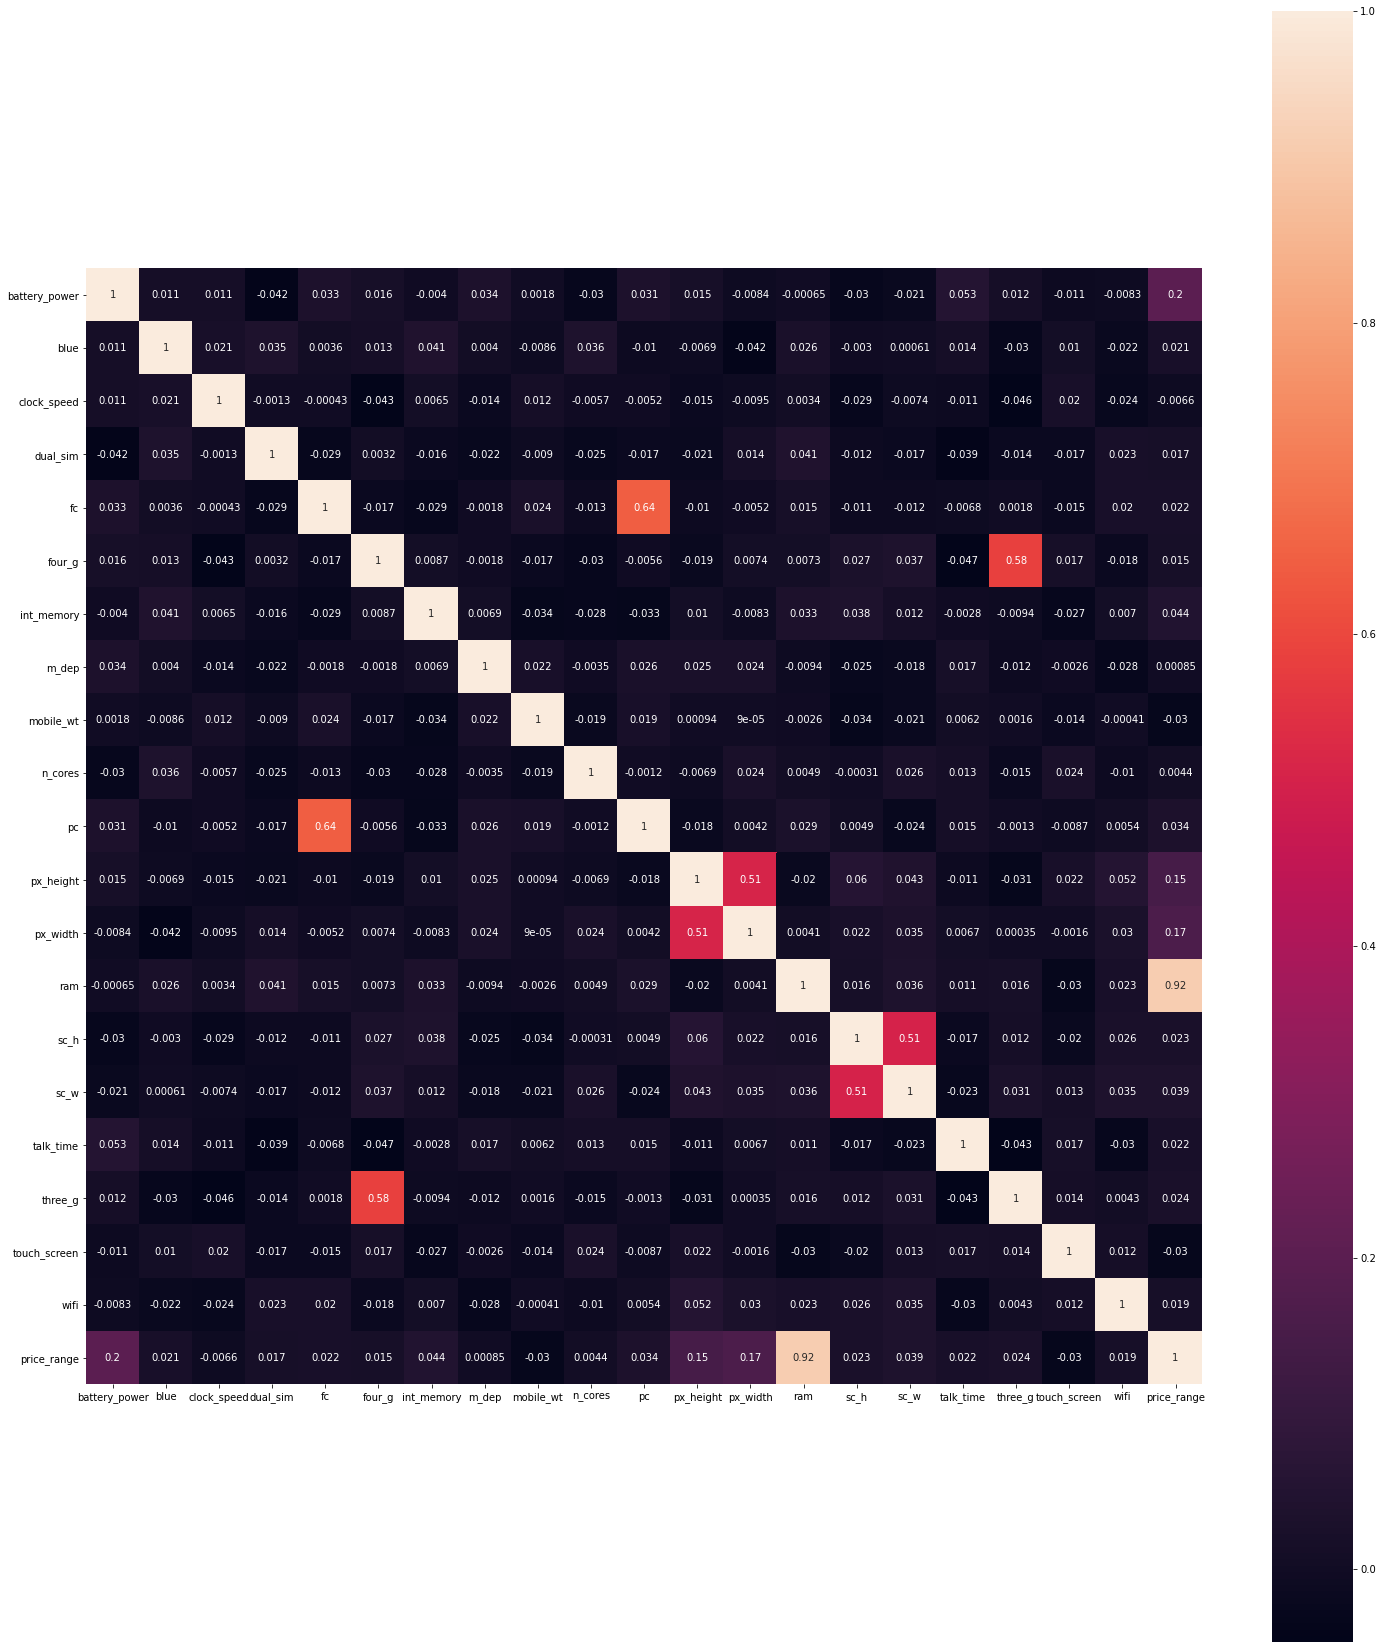

In [101]:
f , ax = plt.subplots(figsize=(25,30))
sns.heatmap(cor_matrix,square=True,annot=True)

In [102]:
x = train3.drop(columns=['price_range'])
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


In [103]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [104]:
#  BAKHSHE 3 HALATE 1

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
log = LogisticRegression()
log.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
ypred = log.predict(xtest)
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
1860,0,0
353,2,2
1333,1,1
905,3,3
1289,1,1


In [108]:
from sklearn.metrics import confusion_matrix , classification_report

In [109]:
print(confusion_matrix(ytest,ypred))

[[146   5   0   0]
 [  8 126  12   0]
 [  0  16 121  11]
 [  0   0   3 152]]


In [110]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.86      0.86      0.86       146
           2       0.89      0.82      0.85       148
           3       0.93      0.98      0.96       155

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



In [111]:
#  BAKHSHE 3 HALATE 2

In [112]:
print('Class 0 have '+ str(len(y.values[(y==0)]))+ ' itme')
print('Class 1 have '+ str(len(y.values[(y==1)]))+ ' itme')
print('Class 2 have '+ str(len(y.values[(y==2)]))+ ' itme')
print('Class 3 have '+ str(len(y.values[(y==3)]))+ ' itme')

Class 0 have 500 itme
Class 1 have 500 itme
Class 2 have 500 itme
Class 3 have 500 itme


In [113]:
#  BAKHSHE 3 HALATE 3

In [114]:
y.values[(y==2)|(y==3)] = 1

In [115]:
y.unique()

array([1, 0])

In [116]:
#  BAKHSHE 3 HALATE 4

In [117]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [118]:
newlog = LogisticRegression()
newlog.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
ypred = newlog.predict(xtest)
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
1860,0,0
353,1,1
1333,1,1
905,1,1
1289,1,1


In [120]:
print(confusion_matrix(ytest,ypred))

[[140  11]
 [  3 446]]


In [121]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       151
           1       0.98      0.99      0.98       449

    accuracy                           0.98       600
   macro avg       0.98      0.96      0.97       600
weighted avg       0.98      0.98      0.98       600



In [122]:
#  BAKHSHE 3 HALATE 5

In [123]:
print('Class 0 :' + str(len(y[y==0])))
print('Class 1 :' + str(len(y[y==1])))

Class 0 :500
Class 1 :1500


In [124]:
import random

In [125]:
rand = []
j = 0
while True:
  if j!= 1000:
    i = random.randint(0,1999)
    if (i not in rand) and (y[i]==1) :
      rand.append(i)
      j = j+1
  else:
    break


In [126]:
rand.sort()
rand

[0,
 3,
 4,
 5,
 12,
 13,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 32,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 45,
 46,
 47,
 49,
 51,
 54,
 58,
 59,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 73,
 75,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 90,
 97,
 99,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 114,
 117,
 119,
 120,
 121,
 123,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 140,
 142,
 143,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 158,
 159,
 161,
 165,
 166,
 169,
 170,
 172,
 173,
 174,
 175,
 177,
 178,
 179,
 182,
 183,
 184,
 187,
 188,
 189,
 191,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 201,
 203,
 206,
 207,
 208,
 209,
 210,
 211,
 213,
 215,
 217,
 219,
 222,
 223,
 228,
 229,
 233,
 234,
 236,
 238,
 240,
 241,
 242,
 243,
 244,
 245,
 247,
 250,
 252,
 255,
 259,
 260,
 261,
 264,
 265,
 267,
 268,
 269,
 273,
 276,
 277,
 281,
 282,
 283,
 284,
 286,
 287,
 288,
 289,
 290,
 291,
 293,
 295,
 296,
 299,
 300,
 303,
 306,
 309,
 310,
 311,
 312,
 314,
 315,
 3

In [127]:
y.drop(index=rand,inplace=True)

In [128]:
x.drop(index=rand,inplace=True)
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.3,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.3,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
6,0.881764,0.0,0.48,0.0,0.210526,1.0,0.129032,0.777778,0.491667,1.000000,0.5,0.194388,0.345794,0.792090,0.571429,0.444444,0.888889,1.0,0.0,1.0
7,0.970608,0.0,0.00,1.0,0.000000,0.0,0.354839,0.777778,0.891667,0.428571,0.0,0.261224,0.433244,0.118653,0.785714,0.166667,0.166667,1.0,1.0,1.0
8,0.630595,1.0,0.00,0.0,0.000000,0.0,0.822581,0.666667,0.783333,0.857143,0.7,0.196939,0.224299,0.225281,0.857143,0.055556,1.000000,1.0,0.0,0.0


In [129]:
print('Class 0 :' + str(len(y[y==0])))
print('Class 1 :' + str(len(y[y==1])))

Class 0 :500
Class 1 :500


In [130]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [131]:
newlog = LogisticRegression()
newlog.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
ypred = newlog.predict(xtest)
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
1077,1,1
1513,0,0
1517,1,1
1368,0,0
850,1,1


In [133]:
print(confusion_matrix(ytest,ypred))

[[153   0]
 [  8 139]]


In [134]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       153
           1       1.00      0.95      0.97       147

    accuracy                           0.97       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [135]:
#  BAKHSHE 3 HALATE 6

In [136]:
y = train3['price_range']

In [137]:
x = train3.drop(columns=['price_range'])
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


In [138]:
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(newlog,k_features=10,forward=True,scoring='roc_auc')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [139]:
from sklearn import preprocessing
yy = preprocessing.label_binarize(y, classes=[0, 1, 2, 3])

In [140]:
features = feature_selector.fit(np.array(x.fillna(0)),yy)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (1600, 4)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (1600, 4)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (1600, 4)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters w

In [141]:
filtered_features= x.columns[list(features.k_feature_idx_)]
filtered_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores'],
      dtype='object')

In [142]:
#  BAKHSHE 3 HALATE 7

In [143]:
xtrain, xtest, ytrain, ytest = train_test_split(x[filtered_features], y, test_size=0.3, random_state=42)

In [144]:
newlog = LogisticRegression()
newlog.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
ypred = newlog.predict(xtest)
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
1860,0,2
353,2,2
1333,1,2
905,3,0
1289,1,1


In [146]:
print(confusion_matrix(ytest,ypred))

[[62 33 25 31]
 [51 23 23 49]
 [46 26 29 47]
 [35 21 23 76]]


In [147]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.32      0.41      0.36       151
           1       0.22      0.16      0.18       146
           2       0.29      0.20      0.23       148
           3       0.37      0.49      0.42       155

    accuracy                           0.32       600
   macro avg       0.30      0.31      0.30       600
weighted avg       0.30      0.32      0.30       600



In [148]:
#  BAKHSHE 3 HALATE 8

In [149]:
from sklearn.decomposition import PCA

In [150]:
pca = PCA(0.71)
x_pca = pca.fit_transform(x)
x_pca.shape

(2000, 10)

In [151]:
#  BAKHSHE 3 HALATE 9

In [152]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [153]:
newlog = LogisticRegression()
newlog.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
ypred = newlog.predict(xtest)
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
1860,0,0
353,2,2
1333,1,0
905,3,2
1289,1,3


In [155]:
print(confusion_matrix(ytest,ypred))

[[62 24 24 41]
 [54 32 23 37]
 [52 24 32 40]
 [25 32 29 69]]


In [156]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.32      0.41      0.36       151
           1       0.29      0.22      0.25       146
           2       0.30      0.22      0.25       148
           3       0.37      0.45      0.40       155

    accuracy                           0.33       600
   macro avg       0.32      0.32      0.32       600
weighted avg       0.32      0.33      0.32       600



In [157]:
#  BAKHSHE 3 HALATE 10

In [158]:
feature_selector = SequentialFeatureSelector(newlog,k_features=10,forward=False,scoring='roc_auc')

In [159]:
features = feature_selector.fit(np.array(x.fillna(0)),yy)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (1600, 4)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (1600, 4)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: bad input shape (1600, 4)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters w

In [160]:
filtered_features= x.columns[list(features.k_feature_idx_)]
filtered_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores'],
      dtype='object')

In [161]:
xtrain, xtest, ytrain, ytest = train_test_split(x[filtered_features], y, test_size=0.3, random_state=42)

In [162]:
newlog = LogisticRegression()
newlog.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
ypred = newlog.predict(xtest)
df = pd.DataFrame({'test':ytest,'pred':ypred})
df.head()

,test,pred
1860,0,2
353,2,2
1333,1,2
905,3,0
1289,1,1


In [164]:
print(confusion_matrix(ytest,ypred))

[[62 33 25 31]
 [51 23 23 49]
 [46 26 29 47]
 [35 21 23 76]]


In [165]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.32      0.41      0.36       151
           1       0.22      0.16      0.18       146
           2       0.29      0.20      0.23       148
           3       0.37      0.49      0.42       155

    accuracy                           0.32       600
   macro avg       0.30      0.31      0.30       600
weighted avg       0.30      0.32      0.30       600



In [166]:
#  BAKHSHE 3 HALATE 11

In [167]:
newlog = LogisticRegression()
newlog.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
acuracy5 = cross_val_score(newlog,x,y.values.reshape(-1,1),cv=5)
acuracy10 =cross_val_score(newlog,x,y.values.reshape(-1,1),cv=10)
mse5 = cross_val_score(newlog,x,y.values.reshape(-1,1),cv=5,scoring='neg_mean_squared_error')
mse10 = cross_val_score(newlog,x,y.values.reshape(-1,1),cv=10,scoring='neg_mean_squared_error')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [169]:
print('acuracy in 5_fold cross validation ' + str(acuracy5.mean()))
print('acuracy in 10_fold cross validation ' + str(acuracy10.mean()))
print('MSE in 5 fold cross validation ' + str(-mse5.mean()))
print('MSE in 10 fold cross validation ' + str(-mse10.mean()))

acuracy in 5_fold cross validation 0.9225
acuracy in 10_fold cross validation 0.9245000000000001
MSE in 5 fold cross validation 0.07749999999999999
MSE in 10 fold cross validation 0.0755
